# Find the Best Model for Rusty Bargain Company

Rusty Bargain is a company that deals with used cars that is currently developing an application to attract new buyers. Inside the application, we can find the market price of a car. Here i have access to historical data: specifications, versions, and vehicle prices. I need to create a model to determine its value.

Rusty Bargain is interested in:

1. Prediction accuracy;
2. Model speed in making predictions;
3. Time required to train the model.

# Content <a id='contents'></a>

* [0 Data Description](#data_desription)

* [1 Data_Preprocessing](#data_preprocessing)
    * [1.1 Load Data](#load_data)
    * [1.2 Initial_Data_Exploration](#initial_data_exploration)
        * [1.2.1 Train Dataframe](#train_dataframe)
        * [1.2.2 Test Dataframe](#test_dataframe)
        * [1.2.3 Full Dataframe](#full_dataframe)
        * [1.2.4 Initial Summary](#initial_summary)
    * [1.3 Find MAE for Recovery Calculation](#find_mae)
    
* [2 Data Analyzation](#data_analyzation)
    * [2.1 Concentration Changes in Each Purification Process](#purification_process)
    * [2.2 Feed Particle Size Distributions](#particle_size_distributions)
    * [2.3 Eliminate Anomallies](#eliminate_anomallies)
    * [2.4 Fill Missing Value](#fill_missing_value)

* [3 Build Model](#build_model)
    * [3.1 Ridge Model](#ridge_model)
    * [3.2 Random Forest Model](#random_forest_model)
    * [3.3 Decision Tree Model](#decision_tree_model)
    * [3.4 Model Test](#model_test)

* [4 Summary](#summary)

# 0. Data Description

**Features:**
- DateCrawled - the date when the profile was downloaded from the database
- VehicleType - the type of vehicle
- RegistrationYear - the year the vehicle was registered
- Gearbox - the type of transmission
- Power - power (in horsepower)
- Model - vehicle model
- Mileage - mileage (measured in km based on a certain regional dataset)
- RegistrationMonth - the month the vehicle was registered
- FuelType - fuel type
- Brand - vehicle brand
- NotRepaired - whether the vehicle has been repaired before
- DateCreated - the date when the profile was created
- NumberOfPictures - number of vehicle pictures
- PostalCode - the postal code of the profile owner (user)
- LastSeen - the date of the user's last activity

**Target:**
- Price - price (in Euros)

## Data Preparation

In [ ]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from scipy import stats as st 

from sklearn.ensemble import RandomForestRegressord
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [ ]:
# load file into Dataframe
df = pd.read_csv('/datasets/car_data.csv')

### Initial Data Exploration

In [ ]:
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
182156,01/04/2016 19:56,6500,sedan,2005,auto,0,a6,150000,5,gasoline,audi,no,01/04/2016 00:00,0,49733,03/04/2016 16:47
240935,14/03/2016 21:48,9000,small,2009,manual,120,fiesta,125000,3,NaN,ford,no,14/03/2016 00:00,0,72336,24/03/2016 04:45
106338,18/03/2016 07:36,8650,bus,2010,manual,80,caddy,90000,5,petrol,volkswagen,no,18/03/2016 00:00,0,25524,23/03/2016 17:47
40651,11/03/2016 13:56,650,small,2002,manual,50,cuore,150000,12,petrol,daihatsu,NaN,11/03/2016 00:00,0,12157,12/03/2016 18:44
344742,05/03/2016 14:53,2150,sedan,1989,manual,166,other,150000,8,petrol,mercedes_benz,no,05/03/2016 00:00,0,86459,27/03/2016 15:16
104791,27/03/2016 20:38,5700,NaN,2018,manual,80,roomster,125000,2,gasoline,skoda,NaN,27/03/2016 00:00,0,92648,05/04/2016 18:45
271425,03/04/2016 09:02,3999,wagon,2007,manual,77,doblo,150000,2,lpg,fiat,NaN,03/04/2016 00:00,0,64807,03/04/2016 09:02
184168,17/03/2016 15:46,2900,wagon,2001,auto,179,e_klasse,150000,7,gasoline,mercedes_benz,NaN,17/03/2016 00:00,0,66132,06/04/2016 23:17
56459,08/03/2016 21:50,1250,small,2001,manual,80,fiesta,150000,11,petrol,ford,no,08/03/2016 00:00,0,31683,06/04/2016 04:16
84434,29/03/2016 21:39,500,small,1997,manual,54,polo,150000,0,petrol,volkswagen,yes,29/03/2016 00:00,0,6110,06/04/2016 07:46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [ ]:
df.isna().sum()/len(df)*100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Mileage               0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

262

In [ ]:
df[(df['RegistrationYear'] <= 1900) | (df['RegistrationYear'] >= 2023)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
622,16/03/2016 16:55,0,NaN,1111,NaN,0,NaN,5000,0,NaN,opel,NaN,16/03/2016 00:00,0,44628,20/03/2016 16:44
12946,29/03/2016 18:39,49,NaN,5000,NaN,0,golf,5000,12,NaN,volkswagen,NaN,29/03/2016 00:00,0,74523,06/04/2016 04:16
15147,14/03/2016 00:52,0,NaN,9999,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,13/03/2016 00:00,0,32689,21/03/2016 23:46
15870,02/04/2016 11:55,1700,NaN,3200,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN,02/04/2016 00:00,0,33649,06/04/2016 09:46
16062,29/03/2016 23:42,190,NaN,1000,NaN,0,mondeo,5000,0,NaN,ford,NaN,29/03/2016 00:00,0,47166,06/04/2016 10:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340548,02/04/2016 17:44,0,NaN,3500,manual,75,NaN,5000,3,petrol,sonstige_autos,NaN,02/04/2016 00:00,0,96465,04/04/2016 15:17
340759,04/04/2016 23:55,700,NaN,1600,manual,1600,a3,150000,4,petrol,audi,no,04/04/2016 00:00,0,86343,05/04/2016 06:44
341791,28/03/2016 17:37,1,NaN,3000,NaN,0,zafira,5000,0,NaN,opel,NaN,28/03/2016 00:00,0,26624,02/04/2016 22:17
348830,22/03/2016 00:38,1,NaN,1000,NaN,1000,NaN,150000,0,NaN,sonstige_autos,NaN,21/03/2016 00:00,0,41472,05/04/2016 14:18


**Brief Summarize:**

The given data is raw data that still needs to be processed. Based on initial data exploration, I can conclude several issues with the data:

1. There are missing data in several columns, with a value of up to 20% of the total data.
2. There are abnormal data in several columns, such as registration year, power, and price.
3. There are duplicate data and inappropriate data types.

The next step I will take is to perform EDA to remove duplicate data, examine and correct abnormal data, fill in missing values, and change the inappropriate data types.

### Handle Problematic Data

In [ ]:
# drop duplicate data
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
# fix columns name
df = df.rename(columns={'DateCrawled': 'date_crawled', 'Price': 'price', 'VehicleType':'vehicle_type', \
                     'RegistrationYear': 'registration_year', 'Gearbox':'gearbox', 'Power':'power', 'Model': 'model', \
                     'Mileage':'mileage', 'RegistrationMonth':'registration_month','FuelType':'fuel_type', 'Brand':'brand', \
                     'NotRepaired':'not_repaired','DateCreated': 'date_created','NumberOfPictures':'number_of_pictures',\
                     'PostalCode':'postal_code','LastSeen':'last_seen'})
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

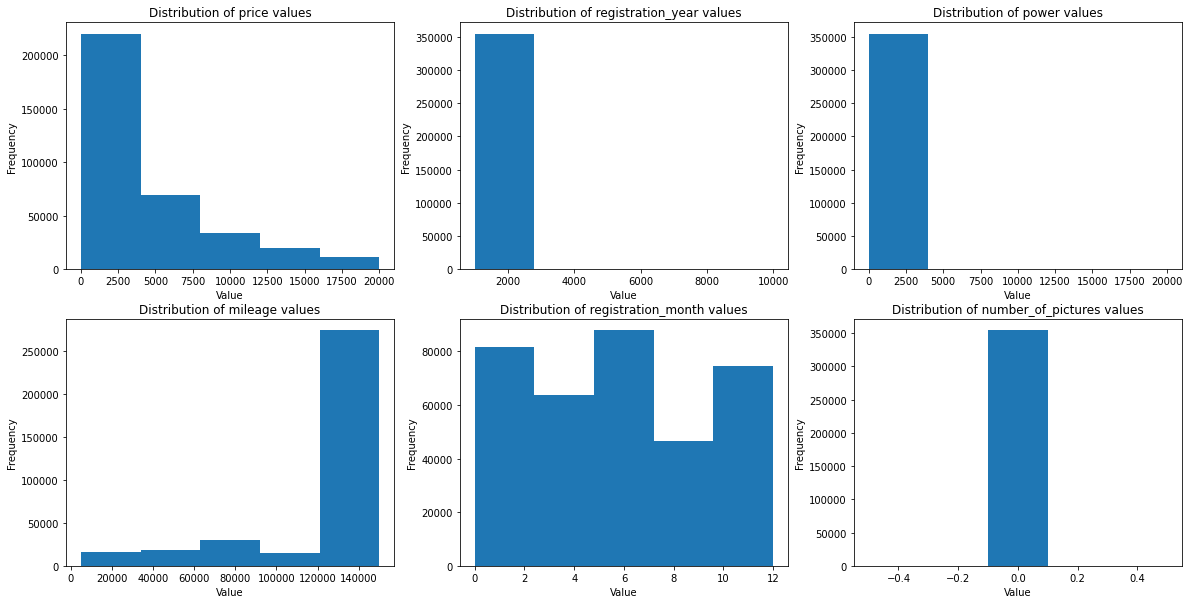

In [ ]:
# checking abnormal values in numeric columns
num_col = ['price', 'registration_year', 'power', 'mileage', 'registration_month', 'number_of_pictures']
plt.figure(figsize=(20, 10))
i = 1
for col in num_col:
    
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=5)
    plt.title(f'Distribution of {col} values')
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    i = i + 1
plt.show()

In [ ]:
# Drop row which have missing values in model column
df = df.dropna(subset=['model']).reset_index(drop=True)
df.model.isna().sum()

0

In [ ]:
# converting NaN values in vehicle_type & model columns to 'missing' object.
df['vehicle_type'] = df['vehicle_type'].replace (np.nan, 'missing')
df['model'] = df['model'].replace (np.nan, 'missing')

In [ ]:
# filetering abnormal values in registration_year
df = df[~(df['registration_year'] <= 1900)]
df = df[~(df['registration_year'] >= 2023)]
df[(df['registration_year'] <= 1900) | (df['registration_year'] >= 2023)]

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen


In [ ]:
df.gearbox.value_counts(dropna=False)

manual    255690
auto       62991
NaN        15629
Name: gearbox, dtype: int64

In [ ]:
# changing NaN values in gearbox column to automatic
df.gearbox = df.gearbox.replace(np.nan, 'auto')
df.gearbox.value_counts(dropna=False)

manual    255690
auto       78620
Name: gearbox, dtype: int64

In [ ]:
# Replacing NaN values in not_repaired column to not_mentioned.
df['not_repaired'] = df['not_repaired'].replace (np.nan, 'not_mentioned')
df.not_repaired.value_counts(dropna = False)

no               238614
not_mentioned     62010
yes               33686
Name: not_repaired, dtype: int64

In [ ]:
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [ ]:
# Assigning a fuel_type to NaN cars based on 'power' column.
df.fuel_type = df.fuel_type.fillna('X')
df['fuel_type'] = np.where((df['fuel_type'] == 'X'), df.groupby('power')['fuel_type'].transform('max'), df['fuel_type'])
df.fuel_type = df.fuel_type.replace('X', np.nan) 
df.dropna(subset=['fuel_type'], how='any', inplace=True)
df.fuel_type.value_counts(dropna = False)

petrol      232555
gasoline     95795
lpg           4960
cng            543
hybrid         208
other          133
electric        66
Name: fuel_type, dtype: int64

In [ ]:
# changing abnormal value in power column
df['power'] = np.where((df['power'] == 0), df.groupby('brand')['power'].transform('mean').round(0), df['power'])
df['power'] = np.where((df['power'] > 500), df.groupby('brand')['power'].transform('mean').round(0), df['power'])
df['power'] = np.where((df['power'] < 50), df.groupby('brand')['power'].transform('mean').round(0), df['power'])
df.power.isna().sum()

0

In [ ]:
# filtering abnormal values in price column
df = df[df['price'] > 100]

In [ ]:
# changing columns data type
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%d/%m/%Y %H:%M')
df['date_created'] = pd.to_datetime(df['date_created'], format='%d/%m/%Y %H:%M')
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%d/%m/%Y %H:%M')

In [ ]:
df = df.reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322771 entries, 0 to 322770
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        322771 non-null  datetime64[ns]
 1   price               322771 non-null  int64         
 2   vehicle_type        322771 non-null  object        
 3   registration_year   322771 non-null  int64         
 4   gearbox             322771 non-null  object        
 5   power               322771 non-null  float64       
 6   model               322771 non-null  object        
 7   mileage             322771 non-null  int64         
 8   registration_month  322771 non-null  int64         
 9   fuel_type           322771 non-null  object        
 10  brand               322771 non-null  object        
 11  not_repaired        322771 non-null  object        
 12  date_created        322771 non-null  datetime64[ns]
 13  number_of_pictures  322771 no

**Brief Summarize:**

After further examining the problematic data, here is a summary of what I did at this stage:

1. Drop duplicate data, rename columns, and change data types.
2. Drop missing data in the 'model' column.
3. Fill missing data in the 'vehicle_type' column with 'missing' and the 'not_repaired' column with 'not_mentioned'.
4. Filter the data so that only car data registered from 1900 to 2023 are used.
5. Replace abnormal data in the 'power' and 'fuel_type' columns based on the values of other columns after grouping.

The next step is to prepare the data for model training.

### Data Preparation for Model Train

In [ ]:
#Creating encoded dataset.
encoder = LabelEncoder()
df_ordinal = pd.DataFrame(df, columns = df.columns)
df_ordinal['vehicle_type'] = encoder.fit_transform(df_ordinal['vehicle_type'])
df_ordinal['gearbox'] = encoder.fit_transform(df_ordinal['gearbox'])
df_ordinal['model'] = encoder.fit_transform(df_ordinal['model'])
df_ordinal['fuel_type'] = encoder.fit_transform(df_ordinal['fuel_type'])
df_ordinal['brand'] = encoder.fit_transform(df_ordinal['brand'])
df_ordinal['not_repaired'] = encoder.fit_transform(df_ordinal['not_repaired'])
display(df_ordinal)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,mileage,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:00,480,3,1993,1,96.0,116,150000,0,6,37,1,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-14 12:52:00,9800,7,2004,0,163.0,117,125000,8,2,14,1,2016-03-14,0,90480,2016-04-05 12:47:00
2,2016-03-17 16:54:00,1500,6,2001,1,75.0,116,150000,6,6,37,0,2016-03-17,0,91074,2016-03-17 17:40:00
3,2016-03-31 17:25:00,3600,6,2008,1,69.0,101,90000,7,2,31,0,2016-03-31,0,60437,2016-04-06 10:17:00
4,2016-04-04 17:36:00,650,5,1995,1,102.0,11,150000,10,6,2,2,2016-04-04,0,33775,2016-04-06 19:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322766,2016-03-19 19:53:00,3200,5,2004,1,225.0,140,150000,5,6,30,2,2016-03-19,0,96465,2016-03-19 20:44:00
322767,2016-03-27 20:36:00,1150,0,2000,1,92.0,249,150000,3,6,24,0,2016-03-27,0,26624,2016-03-29 10:17:00
322768,2016-03-05 19:56:00,1199,1,2000,0,101.0,106,125000,3,6,32,0,2016-03-05,0,26135,2016-03-11 18:17:00
322769,2016-03-19 18:57:00,9200,0,1996,1,102.0,224,150000,3,2,37,0,2016-03-19,0,87439,2016-04-07 07:15:00


**Brief Summarize:**

In this section, I performed labeling on the data using LabelEncoder because the data used is categorical data that does not have an order or hierarchy.

In the next step, I will prepare the feature and target data to train the model.

## Model Train

In [ ]:
df_ordinal = df.drop(['date_crawled', 'date_created', 'last_seen'], axis = 1) 

In [ ]:
# define features and target
features = df_ordinal.drop(['price'], axis=1)
target = df_ordinal['price']

In [ ]:
# split data into 2 datasets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(242078, 12)
(80693, 12)
(242078,)
(80693,)


In [ ]:
feature_names = ['vehicle_type', 'registration_year', 'gearbox', 'power', 'model',
                 'mileage', 'registration_month', 'fuel_type', 'brand', 'not_repaired',
                 'number_of_pictures', 'postal_code']

transformer_mas = MaxAbsScaler().fit(features_train[feature_names].to_numpy())

features_train_scaled = features_train.copy()
features_train_scaled.loc[:, feature_names] = transformer_mas.transform(features_train[feature_names].to_numpy())
features_test_scaled = features_test.copy()
features_test_scaled.loc[:, feature_names] = transformer_mas.transform(features_test[feature_names].to_numpy())

**Brief Summarize:**

In this section, I dropped the 'date_crawled', 'date_created', and 'last_seen' columns as they will not be used to train the model. I also scaled the data to speed up the model training process.

In the next section, I will train the model using LinearRegression, RandomForest, DecisionTree, XGBoost, LightGBM, and CatBoost.

### Linear Regeression

In [ ]:
start_lr = time.process_time()
model_lr = LinearRegression()
model_lr.fit(features_train_scaled, target_train)
predictions_valid_lr = model_lr.predict(features_test_scaled)

lr_rmse = (mean_squared_error(target_test, predictions_valid_lr))**0.5
end_lr = time.process_time()
lr_time = round(end_lr-start_lr,2)
print("Linear Regression RMSE:", lr_rmse)
print(f'Processing time for Linear Regression = {lr_time}')

Linear Regression RMSE: 2942.368258103231
Processing time for Linear Regression = 0.2


Based on the model training, it can be seen that DecisionTree was able to train the model and provide predictions in 0.2 seconds with an RMSE value of 2943. This model will serve as a dummy model to perform a sanity check on the other models.

### Random Forest

In [ ]:
start_rf = time.process_time()
model_rf = RandomForestRegressor(random_state = 12345)
model_rf.fit(features_train_scaled, target_train)
predictions_valid_rf = model_rf.predict(features_test_scaled)

rf_rmse = (mean_squared_error(target_test, predictions_valid_rf))**0.5
end_rf = time.process_time()
rf_time = round(end_rf-start_rf,2)
print("Random Forest RMSE:", rf_rmse)
print(f'Processing time for Random Forest = {rf_time}')

Random Forest RMSE: 1569.934115049923
Processing time for Random Forest = 143.18


In [ ]:
# Hyperparameter_tunning for Random Forest
param_grid = {'n_estimators': [100, 150, 200],
              'max_depth': [3, 5, 10],
              'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state = 12345)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = 5, scoring='neg_root_mean_squared_error')

grid.fit(features_train_scaled, target_train)
predictions_valid = grid.predict(features_test_scaled)
rmse = (mean_squared_error(target_test, predictions_valid))**0.5

print("The best paramenets are %s with a score of %0.2f"% 
      (grid.best_params_,grid.best_score_))
print("Random Forest RMSE:", rmse)

The best paramenets are {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200} with a score of -1933.48
Random Forest RMSE: 1925.5044374203517


In [ ]:
# Train new Random Forest model using tuned hyperparameters
start_rf = time.process_time()
model_rf = RandomForestRegressor(n_estimators = 200,
                                 max_depth = 10,
                                 max_features = 'sqrt',
                                 random_state = 12345)
model_rf.fit(features_train_scaled, target_train)
predictions_valid_rf = model_rf.predict(features_test_scaled)

rf_rmse = (mean_squared_error(target_test, predictions_valid_rf))**0.5
end_rf = time.process_time()
rf_time = round(end_rf-start_rf,2)
print("Random Forest RMSE:", rf_rmse)
print(f'Processing time for Random Forest = {rf_time}')

Random Forest RMSE: 1925.5044374203517
Processing time for Random Forest = 42.07


Based on the experiment, it can be seen that the default Random Forest model without hyperparameter tuning produced a better RMSE value than after tuning. This value is a result of a trade-off for better data processing speed.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
start_dt = time.process_time()
model_dt = DecisionTreeRegressor(random_state = 12345)
model_dt.fit(features_train_scaled, target_train)
predictions_valid_dt = model_dt.predict(features_test_scaled)

dt_rmse = (mean_squared_error(target_test, predictions_valid_dt))**0.5
end_dt = time.process_time()
dt_time = round(end_dt-start_dt,2)
print("Decision Tree RMSE:", dt_rmse)
print(f'Processing time for Decision Tree = {dt_time}')

Decision Tree RMSE: 2153.170435446976
Processing time for Decision Tree = 2.35


Based on the experiment, it can be seen that the default Decision Tree produced a better RMSE value than Linear Regression with a relatively insignificant increase in data processing time.

### XGBoost

In [ ]:
start_xgb = time.process_time()
model_xgb = XGBRegressor(random_state = 12345)
model_xgb.fit(features_train_scaled, target_train)
predictions_valid_xgb = model_xgb.predict(features_test_scaled)

xgb_rmse = (mean_squared_error(target_test, predictions_valid_xgb))**0.5
end_xgb = time.process_time()
xgb_time = round(end_xgb-start_xgb,2)
print("XGBoost RMSE:", xgb_rmse)
print(f'Processing time for XGBoost = {xgb_time}')

XGBoost RMSE: 1627.7543455808639
Processing time for XGBoost = 42.77


In [ ]:
# Train new XGBoost model using tuned hyperparameters
start_xgb = time.process_time()
model_xgb = XGBRegressor(n_estimators = 300,
                         max_depth = 10,
                         learning_rate = 0.1,
                         random_state = 12345)
model_xgb.fit(features_train_scaled, target_train)
predictions_valid_xgb = model_xgb.predict(features_test_scaled)

xgb_rmse = (mean_squared_error(target_test, predictions_valid_xgb))**0.5
end_xgb = time.process_time()
xgb_time = round(end_xgb-start_xgb,2)
print("XGBoost RMSE:", xgb_rmse)
print(f'Processing time for XGBoost = {xgb_time}')

XGBoost RMSE: 1516.4285798633603
Processing time for XGBoost = 249.62


Based on the experiment, it can be seen that the tuned XGBoost model produced an improvement in performance on predicting the data. However, in my opinion, the value of the improvement is not balanced with the significant increase in processing time.

### LightGBM

In [ ]:
start_lgbm = time.process_time()
model_lgbm = LGBMRegressor(random_state = 12345)
model_lgbm.fit(features_train_scaled, target_train)
predictions_valid_lgbm = model_lgbm.predict(features_test_scaled)

lgbm_rmse = (mean_squared_error(target_test, predictions_valid_lgbm))**0.5
end_lgbm = time.process_time()
lgbm_time = round(end_lgbm-start_lgbm,2)
print("LightGBM RMSE:", lgbm_rmse)
print(f'Processing time for LightGBM = {lgbm_time}')

LightGBM RMSE: 1714.0351540555143
Processing time for LightGBM = 4.98


In [ ]:
# Hyperparameter_tunning for LightGBM
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 10],
              'learning_rate': [0.1, 0.01]
}

lgbm = LGBMRegressor(random_state = 12345)

grid = GridSearchCV(estimator = lgbm, 
                    param_grid = param_grid, 
                    cv = 5, scoring= 'neg_root_mean_squared_error')

grid.fit(features_train_scaled, target_train)
predictions_valid = grid.predict(features_test_scaled)
rmse = (mean_squared_error(target_test, predictions_valid))**0.5

print("The best paramenets are %s with a score of %0.2f"% 
      (grid.best_params_,grid.best_score_))
print("LightGBM RMSE:", rmse)

The best paramenets are {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300} with a score of -1636.73
LightGBM RMSE: 1625.6025373804491


In [ ]:
# Train new LightGBM model using tuned hyperparameters
start_lgbm = time.process_time()
model_lgbm = LGBMRegressor(n_estimators = 300,
                           max_depth = 10,
                           learning_rate = 0.1,
                           random_state = 12345)
model_lgbm.fit(features_train_scaled, target_train)
predictions_valid_lgbm = model_lgbm.predict(features_test_scaled)

lgbm_rmse = (mean_squared_error(target_test, predictions_valid_lgbm))**0.5
end_lgbm = time.process_time()
lgbm_time = round(end_lgbm-start_lgbm,2)
print("LightGBM RMSE:", lgbm_rmse)
print(f'Processing time for LightGBM = {lgbm_time}')

LightGBM RMSE: 1625.6025373804491
Processing time for LightGBM = 11.86


Based on the experiment, it can be seen that the LightGBM model produced an outstanding RMSE value with a short processing time, and after tuning, the model's performance increased.

### CatBoost

In [ ]:
start_cat = time.process_time()
model_cat = CatBoostRegressor(random_state = 12345)
model_cat.fit(features_train_scaled, target_train, verbose = 100)
predictions_valid_cat = model_cat.predict(features_test_scaled)

cat_rmse = (mean_squared_error(target_test, predictions_valid_cat))**0.5
end_cat = time.process_time()
cat_time = round(end_cat-start_cat,2)
print("CatBoost RMSE:", cat_rmse)
print(f'Processing time for CatBoost = {cat_time}')

Learning rate set to 0.097464
0:	learn: 4248.4107997	total: 53.5ms	remaining: 53.5s
100:	learn: 1833.7289999	total: 5.2s	remaining: 46.2s
200:	learn: 1738.0595021	total: 10.4s	remaining: 41.2s
300:	learn: 1688.5163261	total: 15.5s	remaining: 35.9s
400:	learn: 1653.8092934	total: 20.6s	remaining: 30.7s
500:	learn: 1627.3673013	total: 25.7s	remaining: 25.5s
600:	learn: 1606.6950782	total: 30.7s	remaining: 20.4s
700:	learn: 1589.5243180	total: 35.8s	remaining: 15.3s
800:	learn: 1574.3440654	total: 40.8s	remaining: 10.1s
900:	learn: 1560.1895105	total: 46s	remaining: 5.05s
999:	learn: 1548.3070387	total: 50.9s	remaining: 0us
CatBoost RMSE: 1613.5333309376813
Processing time for CatBoost = 51.22


In [ ]:
# Hyperparameter_tunning for CatBoost
param_grid = {'iterations': [100, 150, 200],
              'depth': [3, 5, 10],
              'learning_rate': [0.1, 0.01]
}

cat = CatBoostRegressor(random_state = 12345)

grid = GridSearchCV(estimator = cat, 
                    param_grid = param_grid, 
                    cv = 5, scoring='neg_root_mean_squared_error')

grid.fit(features_train_scaled, target_train, verbose = 50)
predictions_valid = grid.predict(features_test_scaled)
rmse = (mean_squared_error(target_test, predictions_valid))**0.5

print("The best paramenets are %s with a score of %0.2f"% 
      (grid.best_params_,grid.best_score_))
print("CatBoost RMSE:", rmse)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 4298.3568644	total: 30ms	remaining: 2.97s
50:	learn: 2189.7695369	total: 1.43s	remaining: 1.37s
99:	learn: 2036.7798413	total: 2.74s	remaining: 0us
0:	learn: 4298.7306575	total: 31.8ms	remaining: 3.15s
50:	learn: 2190.6469640	total: 1.46s	remaining: 1.4s
99:	learn: 2033.8532021	total: 2.75s	remaining: 0us
0:	learn: 4296.0206678	total: 32.1ms	remaining: 3.17s
50:	learn: 2192.4910772	total: 1.46s	remaining: 1.4s
99:	learn: 2036.0716394	total: 2.78s	remaining: 0us
0:	learn: 4302.5729597	total: 33.9ms	remaining: 3.36s
50:	learn: 2193.2474468	total: 1.45s	remaining: 1.39s
99:	learn: 2039.3060600	total: 2.74s	remaining: 0us
0:	learn: 4299.1547248	total: 29.7ms	remaining: 2.94s
50:	learn: 2203.5150518	total: 1.44s	remaining: 1.38s
99:	learn: 2044.7048171	total: 2.72s	remaining: 0us
0:	learn: 4508.6712808	total: 28ms	remaining: 2.77s
50:	learn: 3614.7162843	total: 1.53s	remaining: 1.47s
99:	learn: 3112.1637228	total: 3.04s	remaining: 0us
0:	learn: 4511.1850457	total: 31.3ms	remaining

In [ ]:
# Train new CatBoost model using tuned hyperparameters
start_cat = time.process_time()
model_cat = CatBoostRegressor(iterations = 200,
                              depth = 10,
                              learning_rate = 0.1,
                              random_state = 12345)
model_cat.fit(features_train_scaled, target_train, verbose = 100)
predictions_valid_cat = model_cat.predict(features_test_scaled)

cat_rmse = (mean_squared_error(target_test, predictions_valid_cat))**0.5
end_cat = time.process_time()
cat_time = round(end_cat-start_cat,2)
print("CatBoost RMSE:", cat_rmse)
print(f'Processing time for CatBoost = {cat_time}')

0:	learn: 4215.4502404	total: 168ms	remaining: 33.4s
100:	learn: 1685.1834209	total: 16.5s	remaining: 16.2s
199:	learn: 1585.5321706	total: 32.6s	remaining: 0us
CatBoost RMSE: 1637.311392402146
Processing time for CatBoost = 32.91


Something unique happened with the CatBoost model, as its performance in prediction decreased after hyperparameter tuning, but the processing time became faster.

## Model Analysis

In [ ]:
comparison = pd.DataFrame( 
    {'Model RMSE' : [lr_rmse, dt_rmse, rf_rmse, xgb_rmse, lgbm_rmse, cat_rmse],
    'Processing Time' : [lr_time, dt_time, rf_time, xgb_time, lgbm_time, cat_time]}, 
    index = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'CatBoost'])
comparison

,Model RMSE,Processing Time
Linear Regression,3071.480545,0.20
Decision Tree,2153.170435,2.35
Random Forest,1925.504437,42.07
XGBoost,1516.428580,249.62
LightGBM,1625.602537,11.86
CatBoost,1637.311392,32.91


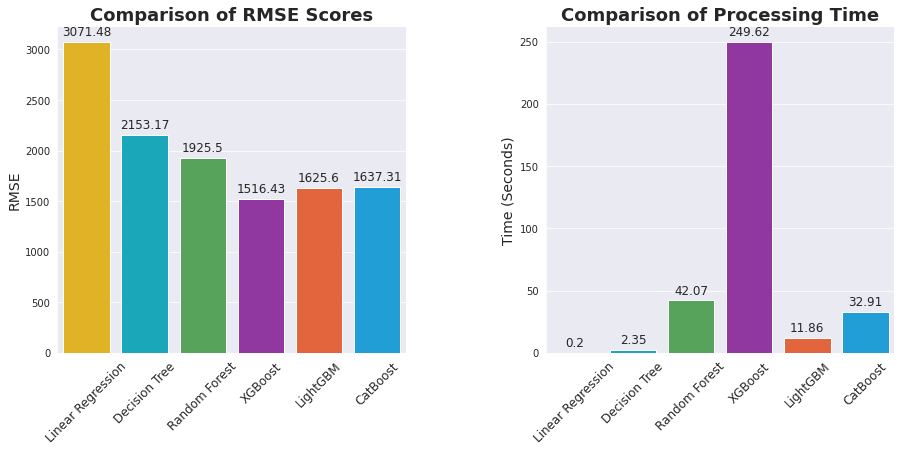

In [ ]:
# Set the color palette
colors = ['#FFC107', '#00BCD4', '#4CAF50', '#9C27B0', '#FF5722', '#03A9F4']
sns.set_palette(sns.color_palette(colors))

# Set the figure size
fig = plt.figure(figsize=(15, 6))

# Create the bar plot for RMSE scores
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(x=comparison.index, y='Model RMSE', data=comparison, ax=ax1)

# Set the title and y-axis label
ax1.set_title('Comparison of RMSE Scores', fontsize=18, fontweight='bold')
ax1.set_ylabel('RMSE', fontsize=14)

# Rotate the x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=12)

# Add value labels to the bars
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Create the bar plot for processing times
ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(x=comparison.index, y='Processing Time', data=comparison, ax=ax2)

# Set the title and y-axis label
ax2.set_title('Comparison of Processing Time', fontsize=18, fontweight='bold')
ax2.set_ylabel('Time (Seconds)', fontsize=14)

# Rotate the x-axis labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=12)

# Add value labels to the bars
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Remove the top and right spines
sns.despine()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

**Brief Summarize:**

Based on the analysis and visualization, it can be seen that models that use the gradient boost method (XGBoost, LightGBM, and CatBoost) produce better predictions, as seen from the RMSE values they generate. When assessed in terms of the model's accuracy in predicting, XGBoost is the best model, followed by LightGBM, CatBoost, RandomForest, DecisionTree, and LinearRegression in last place. However, XGBoost requires the longest processing time compared to other models, so if assessed based on overall performance, the best model order is LightGBM, CatBoost, Random Forest, XGBoost, Decision Tree, and Linear Regression in last place.

## Conclusion

**Based on the analysis that has been conducted, my recommendation for Rusty Bargain** would be to use a gradient boosting model like XGBoost, LightGBM, or CatBoost to develop their car price prediction model.

However, when considering the processing time of the model, it is important to keep the user experience in mind. Users expect an application that is fast and responsive. While XGBoost may be the most accurate model, its longer processing time may result in a slower application, which can negatively impact the user experience.

Therefore, Rusty Bargain may want to consider using a model with a faster processing time, such as LightGBM or CatBoost, to ensure a good user experience. These models have shown to have good accuracy and faster processing times, which can result in a more responsive application that meets user expectations.